In [2]:
%display latex
Parallelism().set(nproc=6) #give us some multithreading to make things faster
viewer3D = 'threejs'

In [3]:
M = Manifold(3, 'M', structure='Lorentzian')
print(M)

3-dimensional Lorentzian manifold M


In [4]:
X.<t,r,th> = M.chart(r"t r:(0,+oo) th:(-pi,pi):\theta")
X[:]

(t, r, th)

In [5]:
R = var("R")
assume(R >= 0)

sigma = var("sigma")
assume(sigma > 1)

w = var("w")
assume(w >= 0)

assume(r > 0)

In [30]:
hat = lambda s, bigRadius: lambda r: ((tanh(s*(r+bigRadius)))-(tanh(s*(r-bigRadius))))/(2*tanh(s*bigRadius)) 

hat(sigma, R)(r)

1/2*(tanh((R + r)*sigma) - tanh(-(R - r)*sigma))/tanh(R*sigma)

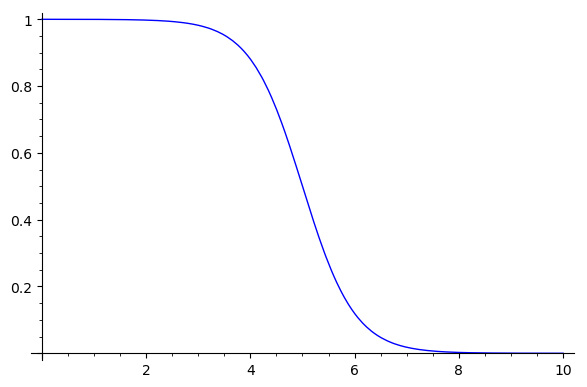

In [31]:
plot(hat(1, 5), xmin = 0, xmax = 10)

In [32]:
radius_prime = lambda s, bigRadius, externalSize: lambda r: hat(s, bigRadius)(r)*abs(r) + (1-hat(s, bigRadius)(r))*(r+externalSize-bigRadius)
assume(radius_prime(sigma, R, w)(r) > 0)
radius_prime(sigma, R, w)(r)

1/2*(R - r - w)*((tanh((R + r)*sigma) - tanh(-(R - r)*sigma))/tanh(R*sigma) - 2) + 1/2*r*(tanh((R + r)*sigma) - tanh(-(R - r)*sigma))/tanh(R*sigma)

In [ ]:
plot(radius_prime(1, 5, 2), xmin = 0, xmax = 10)

In [34]:
g = M.metric()

g[0,0] = -1
g[1,1] = 1
g[2,2] = radius_prime(sigma, R, w)(r)^2
g.display()

g = -dt*dt + dr*dr + 1/4*((R - r - w)*((tanh((R + r)*sigma) - tanh(-(R - r)*sigma))/tanh(R*sigma) - 2) + r*(tanh((R + r)*sigma) - tanh(-(R - r)*sigma))/tanh(R*sigma))^2 dth*dth

In [35]:
g[:]

[                                                                                                                                                 -1                                                                                                                                                   0                                                                                                                                                   0]
[                                                                                                                                                  0                                                                                                                                                   1                                                                                                                                                   0]
[                                                                                                                                                  0                                                                                                                                                   0 1/4*((R - r - w)*((tanh((R + r)*sigma) - tanh(-(R - r)*sigma))/tanh(R*sigma) - 2) + r*(tanh((R + r)*sigma) - tanh(-(R - r)*sigma))/tanh(R*sigma))^2]

In [36]:
g.christoffel_symbols_display()

Gam^r_th,th = 1/4*(R^2*sigma*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R + r)*sigma)^3 - (R^2*sigma*cosh(R*sigma)^2*sinh((R - r)*sigma)^3 - 2*(R^2 - R*r)*sigma*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)^2*sinh(R*sigma) + 2*R*cosh((R - r)*sigma)^2*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) - 4*(R - r)*cosh((R - r)*sigma)^3*sinh(R*sigma)^2)*cosh((R + r)*sigma)^3 - (R^2*sigma*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R - r)*sigma)^2 + 2*R*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)^2*sinh((R + r)*sigma) + (R^2*sigma*cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*(R^2 - R*r)*sigma*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)*sinh((R + r)*sigma)^2 + (sigma*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R + r)*sigma)^3 - sigma*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R + r)*sigma)*sinh((R - r)*sigma)^2 - (sigma*cosh(R*sigma)^2*sinh((R - r)*sigma)^3 - 2*sigma*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)^2*sinh(R*sigma))*cosh((R + r)*sigma)^3 + (sigma*cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*sigma*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)*sinh((R + r)*sigma)^2)*w^2 - 2*(R*sigma*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R + r)*sigma)^3 - (R*sigma*cosh(R*sigma)^2*sinh((R - r)*sigma)^3 - (2*R - r)*sigma*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)^2*sinh(R*sigma) + cosh((R - r)*sigma)^2*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) - 2*cosh((R - r)*sigma)^3*sinh(R*sigma)^2)*cosh((R + r)*sigma)^3 - (R*sigma*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R - r)*sigma)^2 + cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)^2*sinh((R + r)*sigma) + (R*sigma*cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma) - (2*R - r)*sigma*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)*sinh((R + r)*sigma)^2)*w)/(cosh((R + r)*sigma)^3*cosh((R - r)*sigma)^3*sinh(R*sigma)^2) 
Gam^th_r,th = -(R*sigma*cosh((R - r)*sigma)^2*cosh(R*sigma)*sinh((R + r)*sigma)^2 - (R*sigma*cosh(R*sigma)*sinh((R - r)*sigma)^2 + 2*cosh((R - r)*sigma)^2*sinh(R*sigma))*cosh((R + r)*sigma)^2 - (sigma*cosh((R - r)*sigma)^2*cosh(R*sigma)*sinh((R + r)*sigma)^2 - sigma*cosh((R + r)*sigma)^2*cosh(R*sigma)*sinh((R - r)*sigma)^2)*w)/(R*cosh((R + r)*sigma)*cosh((R - r)*sigma)^2*cosh(R*sigma)*sinh((R + r)*sigma) + (R*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma) - 2*(R - r)*cosh((R - r)*sigma)^2*sinh(R*sigma))*cosh((R + r)*sigma)^2 - (cosh((R + r)*sigma)*cosh((R - r)*sigma)^2*cosh(R*sigma)*sinh((R + r)*sigma) + (cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma) - 2*cosh((R - r)*sigma)^2*sinh(R*sigma))*cosh((R + r)*sigma)^2)*w)

In [37]:
g.christoffel_symbols()[0,0,1] == g.christoffel_symbols()[0,1,0]

True

In [38]:
Ruv = g.ricci()

In [39]:
Rscal = g.ricci_scalar()
print(Rscal)

Scalar field r(g) on the 3-dimensional Lorentzian manifold M


In [40]:
E = Ruv - (1/2)*Rscal*g
print(E)

Field of symmetric bilinear forms Ric(g)-unnamed metric on the 3-dimensional Lorentzian manifold M


In [41]:
E[:]

[2*(R^2*sigma^2*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 - R^2*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 + (R^2*sigma^2*cosh((R - r)*sigma)^2*cosh(R*sigma)^2 - 2*(R^2 - R*r)*sigma^2*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) - R^2*sigma^2*cosh(R*sigma)^2)*cosh((R + r)*sigma)^4 + (sigma^2*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 - sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 + (sigma^2*cosh((R - r)*sigma)^2*cosh(R*sigma)^2 - 2*sigma^2*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) - sigma^2*cosh(R*sigma)^2)*cosh((R + r)*sigma)^4 + (sigma^2*cosh((R + r)*sigma)^3*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R - r)*sigma) + (sigma^2*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma))*sinh((R + r)*sigma))*w^2 - 2*(R*sigma^2*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 - R*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 + (R*sigma^2*cosh((R - r)*sigma)^2*cosh(R*sigma)^2 - (2*R - r)*sigma^2*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) - R*sigma^2*cosh(R*sigma)^2)*cosh((R + r)*sigma)^4 + (R*sigma^2*cosh((R + r)*sigma)^3*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R - r)*sigma) + (R*sigma^2*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - (2*R - r)*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma))*sinh((R + r)*sigma))*w + (R^2*sigma^2*cosh((R + r)*sigma)^3*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R - r)*sigma) + (R^2*sigma^2*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*(R^2 - R*r)*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma))*sinh((R + r)*sigma))/(R^2*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2*sinh((R + r)*sigma)^2 + (R^2*cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma)^2 - 4*(R^2 - R*r)*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) + 4*(R^2 - 2*R*r + r^2)*cosh((R - r)*sigma)^4*sinh(R*sigma)^2)*cosh((R + r)*sigma)^4 + 2*(R^2*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*(R^2 - R*r)*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)^3*sinh((R + r)*sigma) + (cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2*sinh((R + r)*sigma)^2 + (cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma)^2 - 4*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) + 4*cosh((R - r)*sigma)^4*sinh(R*sigma)^2)*cosh((R + r)*sigma)^4 + 2*(cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)^3*sinh((R + r)*sigma))*w^2 - 2*(R*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2*sinh((R + r)*sigma)^2 + (R*cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma)^2 - 2*(2*R - r)*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) + 4*(R - r)*cosh((R - r)*sigma)^4*sinh(R*sigma)^2)*cosh((R + r)*sigma)^4 + 2*(R*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - (2*R - r)*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)^3*sinh((R + r)*sigma))*w)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [42]:
massEnergyDensity = E[0,0]
massEnergyDensity

2*(R^2*sigma^2*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 - R^2*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 + (R^2*sigma^2*cosh((R - r)*sigma)^2*cosh(R*sigma)^2 - 2*(R^2 - R*r)*sigma^2*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) - R^2*sigma^2*cosh(R*sigma)^2)*cosh((R + r)*sigma)^4 + (sigma^2*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 - sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 + (sigma^2*cosh((R - r)*sigma)^2*cosh(R*sigma)^2 - 2*sigma^2*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) - sigma^2*cosh(R*sigma)^2)*cosh((R + r)*sigma)^4 + (sigma^2*cosh((R + r)*sigma)^3*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R - r)*sigma) + (sigma^2*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma))*sinh((R + r)*sigma))*w^2 - 2*(R*sigma^2*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 - R*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2 + (R*sigma^2*cosh((R - r)*sigma)^2*cosh(R*sigma)^2 - (2*R - r)*sigma^2*cosh((R - r)*sigma)*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) - R*sigma^2*cosh(R*sigma)^2)*cosh((R + r)*sigma)^4 + (R*sigma^2*cosh((R + r)*sigma)^3*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R - r)*sigma) + (R*sigma^2*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - (2*R - r)*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma))*sinh((R + r)*sigma))*w + (R^2*sigma^2*cosh((R + r)*sigma)^3*cosh((R - r)*sigma)*cosh(R*sigma)^2*sinh((R - r)*sigma) + (R^2*sigma^2*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*(R^2 - R*r)*sigma^2*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma))*sinh((R + r)*sigma))/(R^2*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2*sinh((R + r)*sigma)^2 + (R^2*cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma)^2 - 4*(R^2 - R*r)*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) + 4*(R^2 - 2*R*r + r^2)*cosh((R - r)*sigma)^4*sinh(R*sigma)^2)*cosh((R + r)*sigma)^4 + 2*(R^2*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*(R^2 - R*r)*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)^3*sinh((R + r)*sigma) + (cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2*sinh((R + r)*sigma)^2 + (cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma)^2 - 4*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) + 4*cosh((R - r)*sigma)^4*sinh(R*sigma)^2)*cosh((R + r)*sigma)^4 + 2*(cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - 2*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)^3*sinh((R + r)*sigma))*w^2 - 2*(R*cosh((R + r)*sigma)^2*cosh((R - r)*sigma)^4*cosh(R*sigma)^2*sinh((R + r)*sigma)^2 + (R*cosh((R - r)*sigma)^2*cosh(R*sigma)^2*sinh((R - r)*sigma)^2 - 2*(2*R - r)*cosh((R - r)*sigma)^3*cosh(R*sigma)*sinh((R - r)*sigma)*sinh(R*sigma) + 4*(R - r)*cosh((R - r)*sigma)^4*sinh(R*sigma)^2)*cosh((R + r)*sigma)^4 + 2*(R*cosh((R - r)*sigma)^3*cosh(R*sigma)^2*sinh((R - r)*sigma) - (2*R - r)*cosh((R - r)*sigma)^4*cosh(R*sigma)*sinh(R*sigma))*cosh((R + r)*sigma)^3*sinh((R + r)*sigma))*w)

In [43]:
cordshift = lambda x, y: (sqrt(x^2+y^2), arctan(y/x))

In [44]:
def mass_dist(x, y):
    radius, angle = cordshift(x, y)
    return massEnergyDensity(0, radius, angle)

In [ ]:
x, y = var('x y')
plot3d(mass_dist(x, y)(2.5, 2, 1), (x,-4,4), (y,-4,4))